In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
from textblob import TextBlob

In [5]:
#reading the datasets
df = pd.read_csv('finaldata.csv')
df.head()

,Reviews,Ratings
0,Attended a conference here. The location is go...,4
1,"Above all else, every dealing I had was with f...",4
2,We where here for Oakton. I had a great time w...,5
3,"I will be back, all staff are friendly and pro...",5
4,I have stayed here several time before attendi...,3


In [6]:
#check for null values and dropping them
print(df.shape)
print(df.isnull().values.any())
df.dropna(axis = 0 , inplace = True)
print(df.shape)

(5799, 2)
False
(5799, 2)


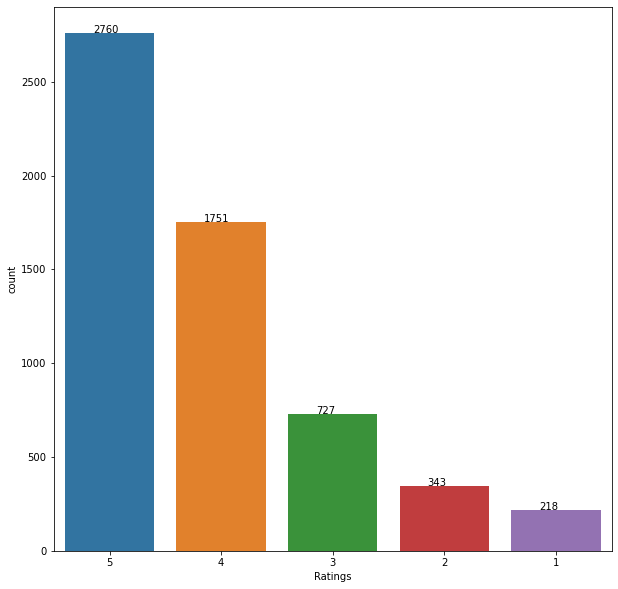

In [7]:
#plot for ratings vs no of count the have appeared
plt.figure(figsize=(10,10))
ax = sns.countplot(x=df["Ratings"],  data=df, order = df["Ratings"].value_counts().index )
for p, label in zip(ax.patches, df["Ratings"].value_counts()):   
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

In [8]:
#Now let’s see which are the words used mostly in positive reviews and the most used words in negative reviews.
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

In [9]:
#Making functions for removal of stopwords, lemmatizing and cleaning text:

def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)
    
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()

In [10]:
#Finding polarity, review length & word count

df['polarity'] = df['Reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['Reviews'].astype(str).apply(len)
df['word_count'] = df['Reviews'].apply(lambda x: len(str(x).split()))


In [11]:
df.head()

,Reviews,Ratings,polarity,review_len,word_count
0,Attended a conference here. The location is go...,4,0.056082,462,78
1,"Above all else, every dealing I had was with f...",4,0.517000,218,40
2,We where here for Oakton. I had a great time w...,5,0.507500,262,49
3,"I will be back, all staff are friendly and pro...",5,0.167647,819,138
4,I have stayed here several time before attendi...,3,0.114413,2138,377


array([[<AxesSubplot:title={'center':'review_len'}>,
        <AxesSubplot:title={'center':'word_count'}>],
       [<AxesSubplot:title={'center':'polarity'}>, <AxesSubplot:>]],
      dtype=object)

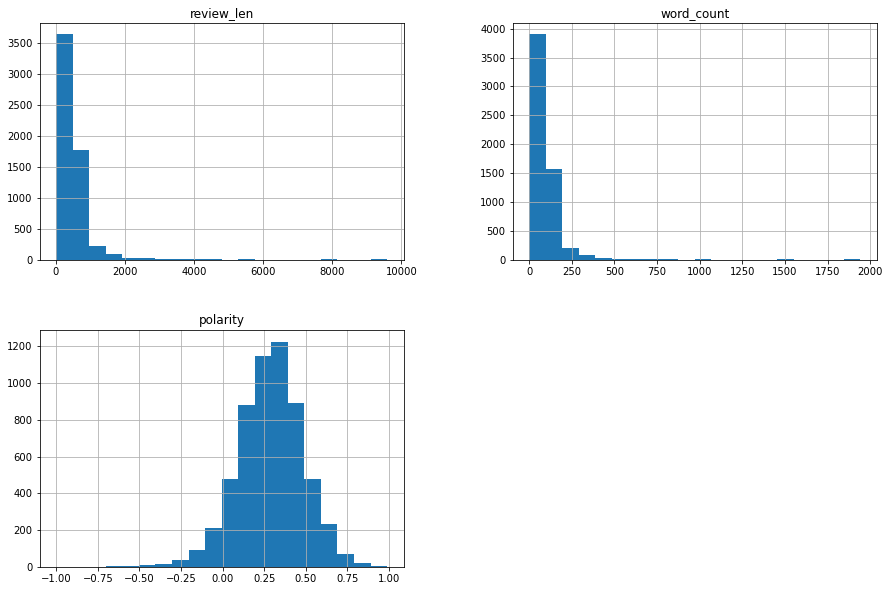

In [12]:
# Distribution of the word_count, review_len, and polarity.

df[["review_len", "word_count", "polarity"]].hist(bins=20, figsize=(15, 10))

In [13]:
#Segregate positive and negative reviews:

rate = (df["Ratings"] == 1) | (df["Ratings"] == 2)
df_rating1 = df[rate]
rate = (df["Ratings"]==4) | (df["Ratings"]==5) | (df["Ratings"]==3)
df_rating2 = df[rate]
print(len(df_rating1))
print(len(df_rating2))

561
5238


In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\galli\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\galli\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [19]:
# Cleaning the text of stopwords, lemmatizing, and cleaning punctuations

df_rating1['Reviews'] = df_rating1['Reviews'].apply(clean_text)
df_rating1['Reviews'] = df_rating1['Reviews'].apply(remove_Stopwords)
df_rating1['Reviews'] = df_rating1['Reviews'].apply(lemmatize_text)

df_rating2['Reviews'] = df_rating2['Reviews'].apply(clean_text)
df_rating2['Reviews'] = df_rating2['Reviews'].apply(remove_Stopwords)
df_rating2['Reviews'] = df_rating2['Reviews'].apply(lemmatize_text)

df_rating1['Num_words_text'] = df_rating1['Reviews'].apply(lambda x:len(str(x).split())) 
df_rating2['Num_words_text'] = df_rating2['Reviews'].apply(lambda x:len(str(x).split()))

<ipython-input-19-b0057a8ef9a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating1['Reviews'] = df_rating1['Reviews'].apply(clean_text)
<ipython-input-19-b0057a8ef9a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating1['Reviews'] = df_rating1['Reviews'].apply(remove_Stopwords)
<ipython-input-19-b0057a8ef9a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

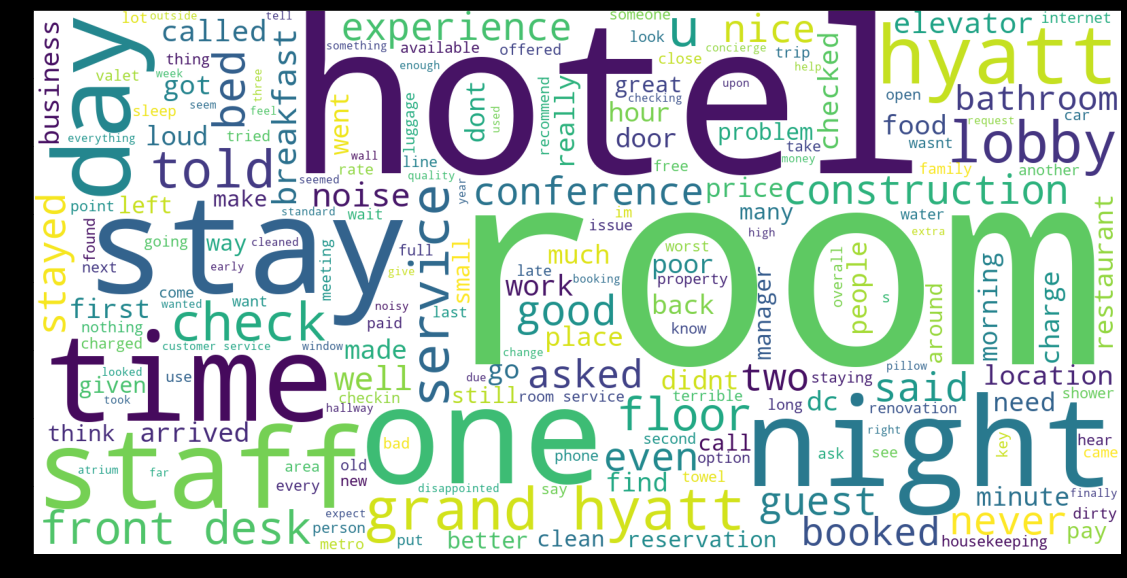

In [22]:
# WordCloud view of negative reviews

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_rating1['Reviews'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

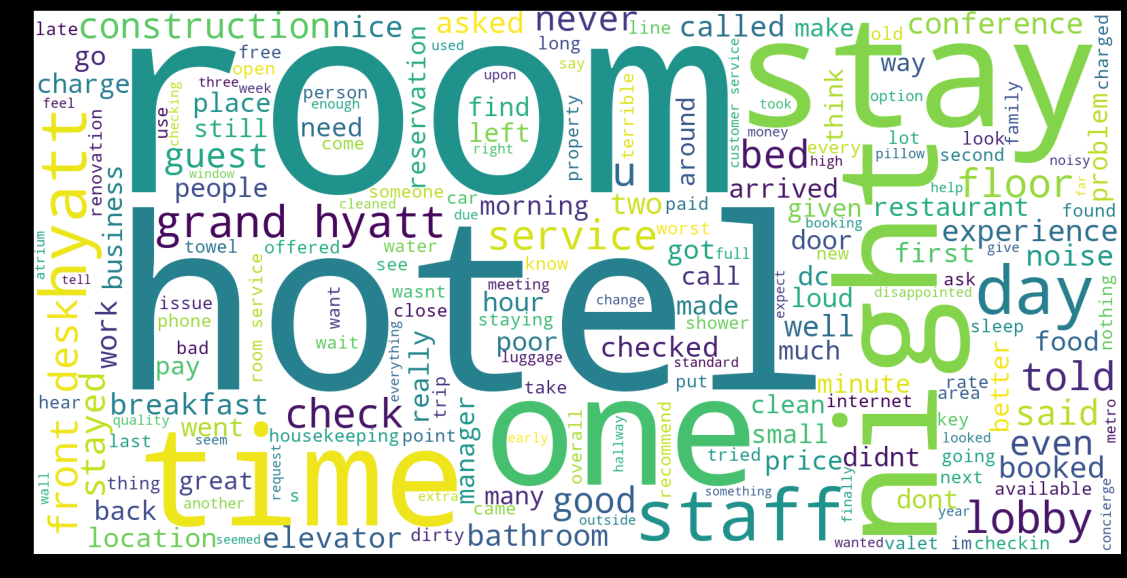

In [23]:
# WordCloud view of positive reviews

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_rating1['Reviews'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

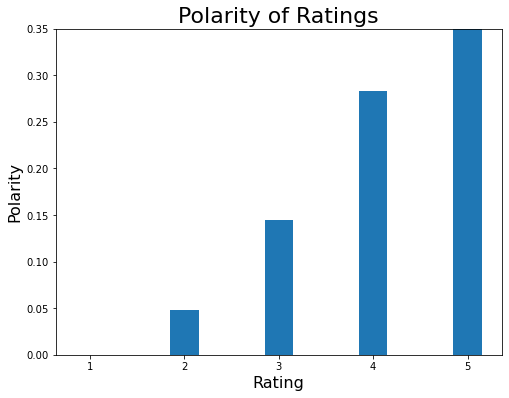

In [25]:
# Distribution for mena polarity Vs Rating

mean_pol = df.groupby('Ratings')['polarity'].agg([np.mean])
mean_pol.columns = ['mean_polarity']
ax = plt.subplots(figsize=(8, 6))
plt.bar(mean_pol.index, mean_pol.mean_polarity, width=0.3)

plt.title("Polarity of Ratings", fontsize=22)
plt.ylabel("Polarity", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.ylim(0, 0.35)
plt.show()

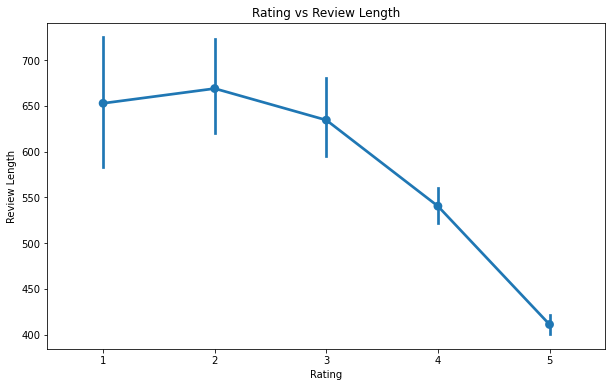

In [26]:
# Distribution of Review length Vs Ratings

plt.figure(figsize=(10, 6))
sns.pointplot(x = "Ratings", y = "review_len", data = df)
plt.xlabel("Rating")
plt.ylabel("Review Length")
plt.title("Rating vs Review Length")
plt.show()

In [27]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
top2_words = get_top_n2_words(df["Reviews"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


,Bi-gram,Freq
0,the hotel,3799
1,in the,2974
2,to the,2503
3,of the,2245
4,and the,2120


[Text(0, 0, 'the hotel'),
 Text(1, 0, 'in the'),
 Text(2, 0, 'to the'),
 Text(3, 0, 'of the'),
 Text(4, 0, 'and the'),
 Text(5, 0, 'at the'),
 Text(6, 0, 'the room'),
 Text(7, 0, 'grand hyatt'),
 Text(8, 0, 'this hotel'),
 Text(9, 0, 'room was'),
 Text(10, 0, 'it was'),
 Text(11, 0, 'the grand'),
 Text(12, 0, 'on the'),
 Text(13, 0, 'hotel is'),
 Text(14, 0, 'the staff'),
 Text(15, 0, 'was very'),
 Text(16, 0, 'from the'),
 Text(17, 0, 'the metro'),
 Text(18, 0, 'for the'),
 Text(19, 0, 'we were')]

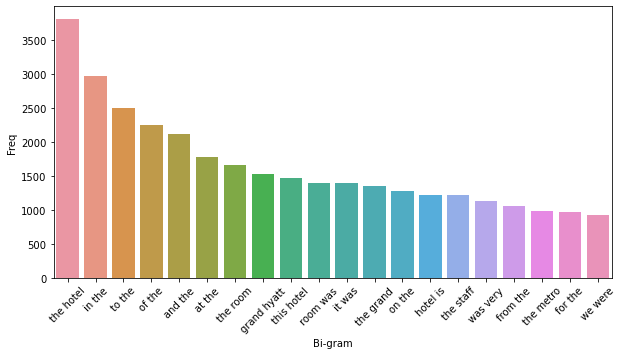

In [32]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [33]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [35]:
top3_words = get_top_n3_words(df["Reviews"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

,Tri-gram,Freq
0,the grand hyatt,1171
1,the hotel is,759
2,the room was,665
3,at the grand,587
4,the front desk,420
...,...,...
195,breakfast buffet was,69
196,the verizon center,69
197,national mall and,68
198,this is the,68


[Text(0, 0, 'the grand hyatt'),
 Text(1, 0, 'the hotel is'),
 Text(2, 0, 'the room was'),
 Text(3, 0, 'at the grand'),
 Text(4, 0, 'the front desk'),
 Text(5, 0, 'the hotel was'),
 Text(6, 0, 'of the hotel'),
 Text(7, 0, 'the staff was'),
 Text(8, 0, 'walking distance to'),
 Text(9, 0, 'within walking distance'),
 Text(10, 0, 'the rooms are'),
 Text(11, 0, 'the white house'),
 Text(12, 0, 'to the metro'),
 Text(13, 0, 'this hotel is'),
 Text(14, 0, 'in the lobby'),
 Text(15, 0, 'in the hotel'),
 Text(16, 0, 'the location is'),
 Text(17, 0, 'at this hotel'),
 Text(18, 0, 'in the room'),
 Text(19, 0, 'stay here again')]

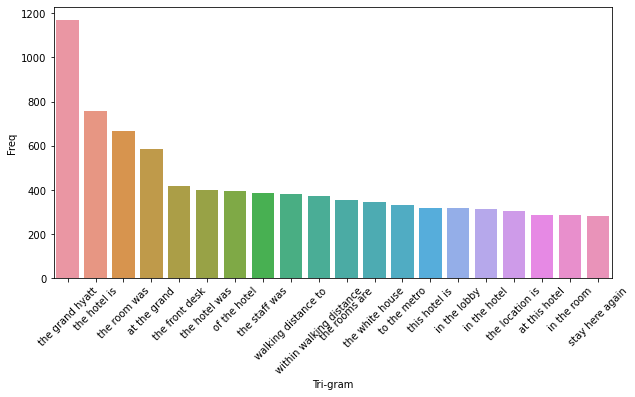

In [36]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])